In [2]:
using Plots
using Plots.PlotMeasures
using JLD2
using StatsBase
using StatsPlots

# Inspect ECG200 Benchmarking Results

Run 1:
- chi_max: [15, 40]
- d: [2, 6]
- eta: [0.001, 10]
- n = 30 models
- Particle Swarm Optimisation

In [3]:
f = jldopen("ECG200Bench_eta001:10_d2:6_chi15:40.jld2", "r");
per_fold_accs_r1 = read(f, "per_fold_accs");
per_fold_best_model_r1 = read(f, "per_fold_best_model");

In [5]:
mean_acc_r1 = mean(per_fold_accs_r1);
println("Mean Acc: $mean_acc_r1")
median_acc_r1 = median(per_fold_accs_r1);
println("Median Acc: $median_acc_r1")
range_acc_r1 = maximum(per_fold_accs_r1) - minimum(per_fold_accs_r1)
println("Range Acc: $range_acc_r1")
std_acc_r1 = std(per_fold_accs_r1)
println("Std Acc: $std_acc_r1")
standard_err_acc_r1 = std_acc_r1 / sqrt(length(per_fold_accs_r1));
println("Standard Error Acc: $standard_err_acc_r1")

Mean Acc: 0.8893333333333333
Median Acc: 0.89
Range Acc: 0.12
Std Acc: 0.03027840169486167
Standard Error Acc: 0.00552805453782613


Inspect the distribution of optimal parameters

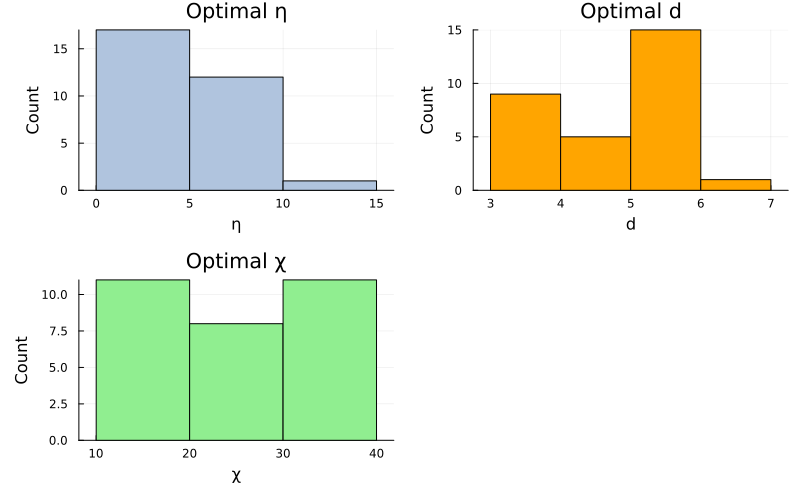

In [6]:
all_etas_r1 = [per_fold_best_model_r1[i]["eta"] for i in 1:length(per_fold_best_model_r1)]
all_ds_r1 = [per_fold_best_model_r1[i]["d"] for i in 1:length(per_fold_best_model_r1)]
all_chis_r1 = [per_fold_best_model_r1[i]["chi_max"] for i in 1:length(per_fold_best_model_r1)];
p1 = histogram(all_etas_r1, label="", xlabel="η", ylabel="Count", title="Optimal η", c=:lightsteelblue)
p2 = histogram(all_ds_r1, label="", xlabel="d", ylabel="Count", title="Optimal d", c=:orange)
p3 = histogram(all_chis_r1, label="", xlabel="χ", ylabel="Count", title = "Optimal χ", c=:lightgreen)
plot(p1, p2, p3, size=(800, 500), left_margin=5mm, bottom_margin=5mm)

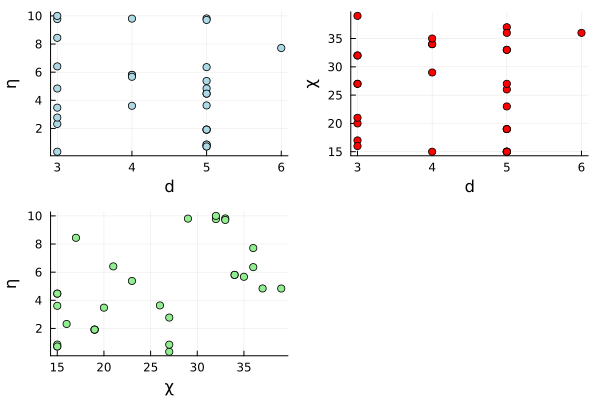

In [8]:
p1 = scatter(all_ds_r1, all_etas_r1, label="", xlabel="d", ylabel="η", color=:lightblue)
p2 = scatter(all_ds_r1, all_chis_r1, label="", xlabel="d", ylabel="χ", color=:red)
p3 = scatter(all_chis_r1, all_etas_r1, label="", xlabel="χ", ylabel="η", color=:lightgreen)
plot(p1, p2, p3)